Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing needed libraries
import numpy as np
import cv2
import PIL.Image as Image
import os
import time
from tensorflow.keras.applications import VGG19
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras.layers import Activation, Dropout, BatchNormalization, Dense
from keras.metrics import categorical_crossentropy
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import seaborn as sns
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.svm import SVC
import random
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import SGD
from keras.models import Model
from keras import optimizers , layers, applications
import random
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical

MobileNet + SVM

In [ ]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))])

In [ ]:
import pathlib
data_dir='/content/drive/MyDrive/AutismDataset/train'
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/AutismDataset/train')

In [ ]:
len(list(data_dir.glob('*.jpg')))

2540

In [ ]:
autistic=list(data_dir.glob('Autistic*'))

In [ ]:
len(autistic)

1270

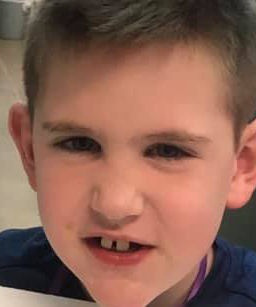

In [ ]:
Image.open(str(autistic[3]))

In [ ]:
nonautistic=list(data_dir.glob('Non_Autistic*'))
len(nonautistic)

1270

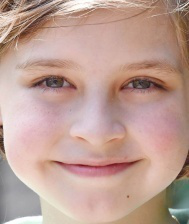

In [ ]:
Image.open(str(nonautistic[3]))

In [ ]:
images_dic={'autistic':list(data_dir.glob('Autistic*')),'nonautistic':list(data_dir.glob('Non_Autistic*'))}
labels_dic={'autistic':0,'nonautistic':1}

In [ ]:
X_train, y_train = [], []

for name, images in images_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X_train.append(resized_img)
        y_train.append(labels_dic[name])

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape

(2540, 224, 224, 3)

In [ ]:
X_train

array([[[[211, 230, 235],
         [212, 231, 236],
         [215, 231, 237],
         ...,
         [ 27,  28,  24],
         [ 30,  34,  29],
         [ 33,  38,  37]],

        [[208, 227, 232],
         [209, 228, 233],
         [212, 228, 234],
         ...,
         [ 25,  26,  22],
         [ 27,  31,  26],
         [ 30,  35,  34]],

        [[211, 230, 235],
         [211, 230, 235],
         [213, 229, 235],
         ...,
         [ 24,  25,  21],
         [ 26,  30,  25],
         [ 28,  33,  32]],

        ...,

        [[213, 221, 238],
         [213, 221, 238],
         [213, 221, 238],
         ...,
         [218, 229, 243],
         [216, 227, 241],
         [215, 226, 240]],

        [[213, 221, 238],
         [213, 221, 238],
         [213, 221, 238],
         ...,
         [218, 229, 243],
         [217, 228, 242],
         [216, 227, 241]],

        [[213, 221, 238],
         [213, 221, 238],
         [213, 221, 238],
         ...,
         [216, 229, 245],
        

In [ ]:
X_train_scaled = X_train  
X_train_scaled

array([[[[211, 230, 235],
         [212, 231, 236],
         [215, 231, 237],
         ...,
         [ 27,  28,  24],
         [ 30,  34,  29],
         [ 33,  38,  37]],

        [[208, 227, 232],
         [209, 228, 233],
         [212, 228, 234],
         ...,
         [ 25,  26,  22],
         [ 27,  31,  26],
         [ 30,  35,  34]],

        [[211, 230, 235],
         [211, 230, 235],
         [213, 229, 235],
         ...,
         [ 24,  25,  21],
         [ 26,  30,  25],
         [ 28,  33,  32]],

        ...,

        [[213, 221, 238],
         [213, 221, 238],
         [213, 221, 238],
         ...,
         [218, 229, 243],
         [216, 227, 241],
         [215, 226, 240]],

        [[213, 221, 238],
         [213, 221, 238],
         [213, 221, 238],
         ...,
         [218, 229, 243],
         [217, 228, 242],
         [216, 227, 241]],

        [[213, 221, 238],
         [213, 221, 238],
         [213, 221, 238],
         ...,
         [216, 229, 245],
        

In [ ]:
data_dir_test='/content/drive/MyDrive/AutismDataset/test'
data_dir_test= pathlib.Path(data_dir_test)
images_dic_test={'autistic':list(data_dir_test.glob('Autistic*')),'nonautistic':list(data_dir_test.glob('Non_Autistic*'))}
labels_dic_test={'autistic':0,'nonautistic':1}

In [ ]:
X_test, y_test = [], []
for name, images in images_dic_test.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X_test.append(resized_img)
        y_test.append(labels_dic[name])
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:

predicted = classifier.predict(np.array([X_train[0],X_train[1],X_train[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 795])

In [ ]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

24576/10484 [======================================================================] - 0s 0us/step


'/root/.keras/datasets/ImageNetLabels.txt'

In [ ]:

image_labels = []
with open("/root/.keras/datasets/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[795]


'shower curtain'

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_classes = 2
model = tf.keras.Sequential([pretrained_model_without_top_layer,tf.keras.layers.Dense(num_of_classes)])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
80/80 [==============================] - 12s 84ms/step - loss: 0.6515 - acc: 0.6252
Epoch 2/5
80/80 [==============================] - 6s 78ms/step - loss: 0.5746 - acc: 0.6941
Epoch 3/5
80/80 [==============================] - 7s 81ms/step - loss: 0.5429 - acc: 0.7224
Epoch 4/5
80/80 [==============================] - 7s 84ms/step - loss: 0.5290 - acc: 0.7386
Epoch 5/5
80/80 [==============================] - 6s 79ms/step - loss: 0.5132 - acc: 0.7425


In [ ]:
X_test_scaled=X_test/255
y_test_scaled=y_test/255

In [ ]:
model.evaluate(X_test_scaled,y_test)
model.save('/content/drive/MyDrive/WorksFine2')

10/10 [==============================] - 1s 82ms/step - loss: 0.7468 - acc: 0.5733
INFO:tensorflow:Assets written to: /content/drive/MyDrive/WorksFine2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/WorksFine2/assets


In [ ]:
def predicts(model,x):
  x = cv2.imread(x)
  resized_img = cv2.resize(x,(224,224))
  x_pre=np.array(resized_img).reshape((1,224,224,3))
  predictions=model(x_pre)
  predicted = np.argmax(predictions, axis=1)
  return predicted

In [ ]:
def detect_human(path):
    count=0
    face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 
    img = cv2.imread(path)
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=5)
    for x, y, w, h in faces:
        img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
        count+=1
    resized=cv2.resize(img,(int(img.shape[1]/3), int(img.shape[0]/3)))
    return count


SVM

In [ ]:
asd = pd.read_csv("Toddler Autism dataset July 2018.csv")
asd.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
asd.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

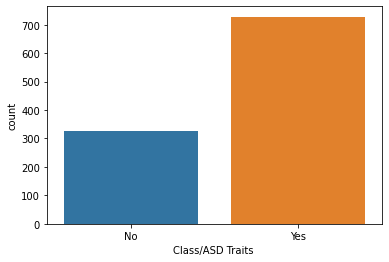

In [ ]:
sns.countplot(x='Class/ASD Traits ' , data=asd)

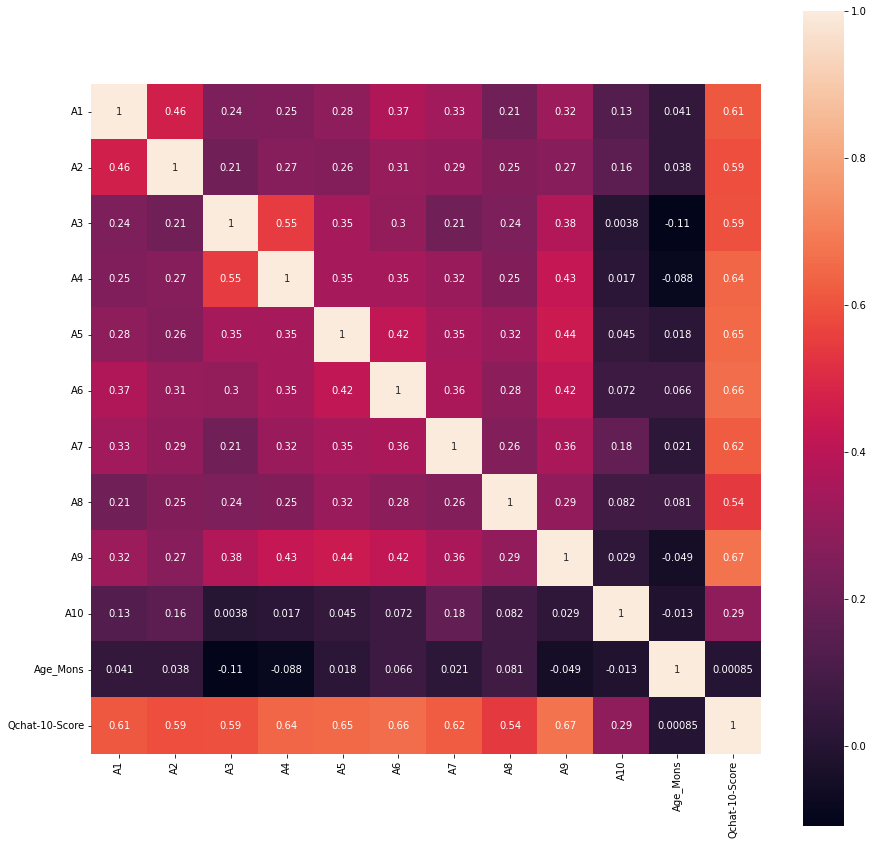

In [ ]:
corr = asd.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

In [ ]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Qchat-10-Score       1054 non-null   int64 
 12  Sex                  1054 non-null   object
 13  Ethnicity            1054 non-null   object
 14  Jaundice             1054 non-null   object
 15  Family_mem_with_ASD  1054 non-null   object
 16  Class/

In [ ]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    asd[col] = le.fit_transform(asd[col])

In [ ]:
X = asd.drop(['Class/ASD Traits '], axis = 1)
Y = asd['Class/ASD Traits ']
columns = list(asd.columns)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)

In [ ]:
SVM_model = SVC()
SVM_model.fit(x_train, y_train)
pred = SVM_model.predict(x_test)
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.95      0.97        62\n           1       0.98      0.99      0.99       149\n\n    accuracy                           0.98       211\n   macro avg       0.98      0.97      0.98       211\nweighted avg       0.98      0.98      0.98       211\n'

In [ ]:
accuracy_score(y_test, pred)

0.981042654028436

In [ ]:
def prediction(url,feature_list):
  #for image
  img = tf.keras.preprocessing.image.load_img(url,target_size=(224,224,2))
  img_nparray = tf.keras.preprocessing.image.img_to_array(img)
  input_Batch = np.array([img_nparray])  
  predictions = predicts(model,url)
  #for the features
  arr = np.array(feature_list)
  arr = arr.reshape(1,16)
  res = SVM_model.predict(arr)
  print("Image Classification gives result as","Non Autistic" if(predictions==1) else "Autistic")
  print("Attributes entered gives result as","Non Autistic" if(res==0) else "Autistic")
  if predictions < 0.5 and res == 1:
    print("Final Prediction: Autistic")
  elif predictions > 0.5 and res == 0:
    print("Final Prediction: Non Autistic")
  else:
    print("Final Prediction: Image classification model and characteristics model give contradicting answers!!")

In [ ]:
if __name__=="__main__":
  path_of_image = input("Enter image link: ")
  #model = model
  model=tf.keras.models.load_model('/content/drive/MyDrive/WorksFine')
  final_list = [[int(input("Enter "+ columns[i] + ": ")) for _ in range(1)] for i in range(16)]
  if(detect_human(path_of_image)>0):
    prediction(path_of_image,final_list)
  else:
    print("Final Prediction: Image given doesnt have a face to proceed to detect for autism")

Enter image link: car.jpg
Enter A1: 1
Enter A2: 0
Enter A3: 1
Enter A4: 1
Enter A5: 1
Enter A6: 1
Enter A7: 1
Enter A8: 1
Enter A9: 1
Enter A10: 1
Enter Age_Mons: 1
Enter Qchat-10-Score: 1
Enter Sex: 1
Enter Ethnicity: 1
Enter Jaundice: 1
Enter Family_mem_with_ASD: 1
Final Prediction: Image given doesnt have a face to proceed to detect for autism


VGG16 + SVM

In [ ]:
filenames = os.listdir("/content/drive/MyDrive/AutismDataset/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

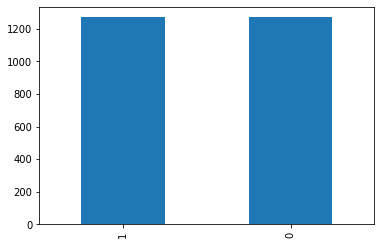

In [ ]:
train_df['category'].value_counts().plot.bar()

In [ ]:
test_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/test")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

test_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
test_df.head()

,filename,category
0,Autistic.894.jpg,1
1,Non_Autistic.1057.jpg,0
2,Autistic.997.jpg,1
3,Non_Autistic.1154.jpg,0
4,Non_Autistic.1077.jpg,0


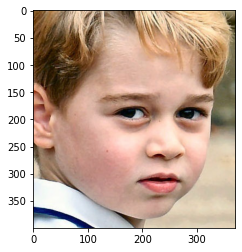

In [ ]:
sample = random.choice(filenames)
image = load_img("/content/drive/MyDrive/AutismDataset/train/"+sample)
plt.imshow(image)

In [ ]:
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 20
batch_size = 20

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

x = GlobalMaxPooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:

train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()


total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/MyDrive/AutismDataset/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2286 validated image filenames belonging to 2 classes.


In [ ]:
# Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/MyDrive/AutismDataset/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 254 validated image filenames belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.795833  ;  loss = 0.458406 


In [ ]:
test_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/MyDrive/AutismDataset/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 300 validated image filenames.


In [ ]:
threshold = 0.5
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
test_df['category'] = np.where(predict > threshold, 1,0)

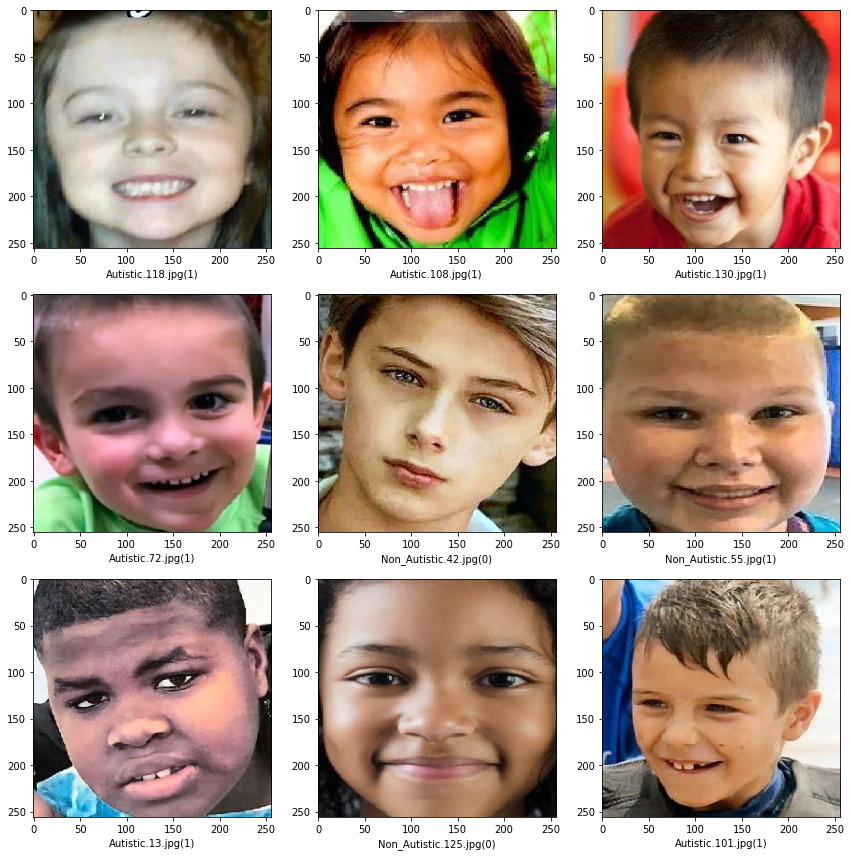

In [ ]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/MyDrive/AutismDataset/test/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [ ]:
def prediction(url,feature_list):
  #for image
  img = tf.keras.preprocessing.image.load_img(url,target_size=(224,224,2))
  img_nparray = tf.keras.preprocessing.image.img_to_array(img)
  input_Batch = np.array([img_nparray])  
  predictions = model.predict(input_Batch)
  #for the features
  arr = np.array(feature_list)
  arr = arr.reshape(1,16)
  res = SVM_model.predict(arr)
  if predictions > 0.5 and res == 1:
    print("Autistic")
  elif predictions < 0.5 and res == 0:
    print("Non Autistic")
  else:
    print("Image classification model and characteristics model give contradicting answers!!")

In [ ]:
url = input("enter url/image link : ")
#url = "/content/drive/MyDrive/AutismDataset/test/Autistic.123.jpg"
list_size = int(input("Enter the number of sub list "))
final_list = [[int(input("Enter "+ columns[i] + ": ")) for _ in range(1)] for i in range(16)]
res = prediction(url,feature_list)

enter url/image link : /content/drive/MyDrive/AutismDataset/test/Autistic.123.jpg
Enter the number of sub list 16
Enter attribute and press enter: 1
Enter attribute and press enter: 1
Enter attribute and press enter: 0
Enter attribute and press enter: 0
Enter attribute and press enter: 0
Enter attribute and press enter: 1
Enter attribute and press enter: 1
Enter attribute and press enter: 0
Enter attribute and press enter: 0
Enter attribute and press enter: 0
Enter attribute and press enter: 36
Enter attribute and press enter: 4
Enter attribute and press enter: 1
Enter attribute and press enter: 5
Enter attribute and press enter: 0
Enter attribute and press enter: 1
List is [[1], [1], [0], [0], [0], [1], [1], [0], [0], [0], [36], [4], [1], [5], [0], [1]]
Autistic


VGG19

In [ ]:
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 20
batch_size = 20

pre_trained_model = VGG19(input_shape=input_shape, include_top=False, weights="imagenet")
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

x = GlobalMaxPooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()


total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/MyDrive/AutismDataset/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2057 validated image filenames belonging to 2 classes.


In [ ]:
# Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/MyDrive/AutismDataset/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 229 validated image filenames belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/20
102/102 [==============================] - 54s 518ms/step - loss: 0.7142 - accuracy: 0.5557 - val_loss: 0.6166 - val_accuracy: 0.6773
Epoch 2/20
102/102 [==============================] - 44s 434ms/step - loss: 0.6036 - accuracy: 0.6716 - val_loss: 0.5991 - val_accuracy: 0.6864
Epoch 3/20
102/102 [==============================] - 44s 432ms/step - loss: 0.5490 - accuracy: 0.7251 - val_loss: 0.4830 - val_accuracy: 0.7364
Epoch 4/20
102/102 [==============================] - 44s 431ms/step - loss: 0.5085 - accuracy: 0.7516 - val_loss: 0.4942 - val_accuracy: 0.8091
Epoch 5/20
102/102 [==============================] - 49s 480ms/step - loss: 0.4661 - accuracy: 0.7712 - val_loss: 0.3943 - val_accuracy: 0.8045
Epoch 6/20
102/102 [==============================] - 44s 431ms/step - loss: 0.4243 - accuracy: 0.8012 - val_loss: 0.4582 - val_accuracy: 0.7818
Epoch 7/20
102/102 [==============================] - 44s 432ms/step - loss: 0.4207 - accuracy: 0.8130 - val_loss: 0.4936 - val_ac

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.845455  ;  loss = 0.387845 


In [ ]:
test_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/MyDrive/AutismDataset/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 300 validated image filenames.


In [ ]:
threshold = 0.5
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

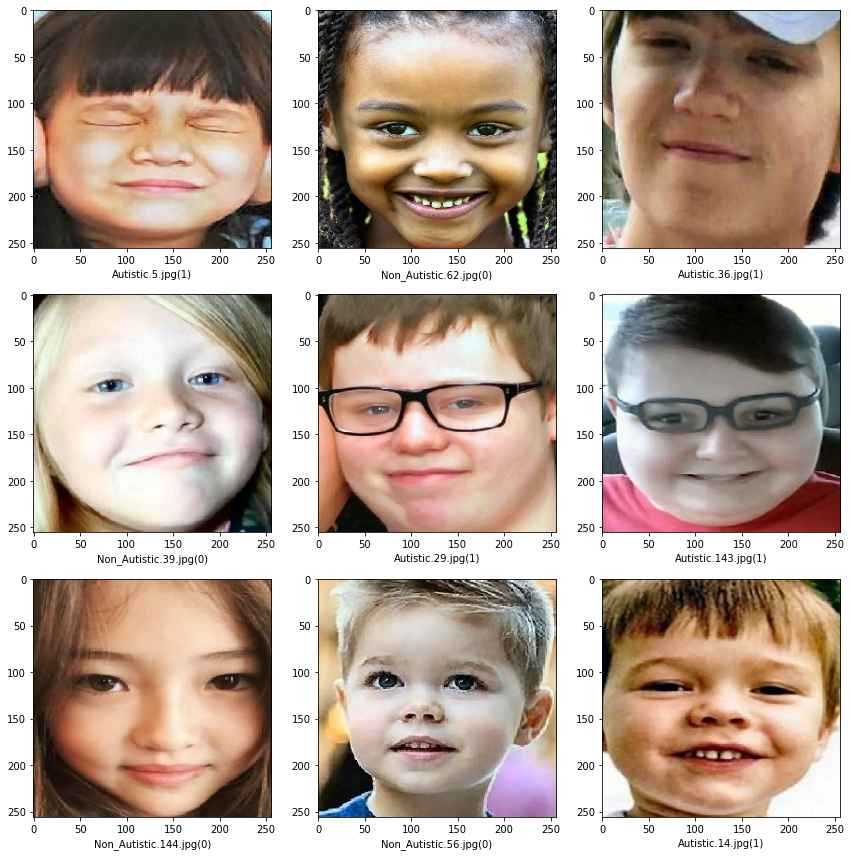

In [ ]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/MyDrive/AutismDataset/test/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()